# Julia: an introduction

Borrowed extensively from

- David P. Sanders ([link](https://github.com/dpsanders))
- Bogumił Kamiński ([link](https://github.com/bkamins))

#### Göttingen, 18.10.17

# What is Julia?

http://julialang.org/

- Programming language 

- Free and open source (MIT licensed)

- Whose design incorporates best ideas from other languages

- Interactive but (just in time) compiled

- Compiled, therefore fast

- Extensible - by writing Julia code

- Packages designed to interact with each other

Julia allows me to:

- Write readable code

- That is generic (works with objects of different types)

- But is fast

For an interesting discussion of what makes Julia unique compared to the various attempts to accelerate Python etc., see
https://discourse.julialang.org/t/julia-motivation-why-werent-numpy-scipy-numba-good-enough/

## Some history

- Work on Julia was started in **2009**

- On **2012** it had a public website

- **JuliaCon**, a yearly conference, first met in **2014**

- ~ 250K users

### Julia is (not) quite stable (yet)

- Yesterday (May-2017): **v0.5**



- Today: **v0.6**



- Tomorrow: **v1.0** - first long-term stable release

# Use in Genetics

- BioJulia http://biojulia.net/
![biojulia](http://biojulia.net/img/BioJulia_Brand.svg)

- Quantitative genetics Triangle Lab http://qtl.rocks/

    - _Introduction to Julia for Statistical Genetics_, by Hao Cheng and Rohan Fernando
    - _Statistical Methods for Whole Genome Analyses_, by Rohan Fernando

- BGLR-Julia https://github.com/gdlc/BGLR.jl

# In statistics

- JuliaStats http://juliastats.github.io/
![juliastats](https://avatars2.githubusercontent.com/u/2761531?v=4&s=200)
- MixedModels.jl, by Douglas Bates (nlme, lme4 in R)
- Quite a few neural network packages ([Knet.jl](https://github.com/denizyuret/Knet.jl), [MXNet.jl](https://github.com/dmlc/MXNet.jl),...)

# How to use Julia

- **Command line:** Interactive experiments (REPL) and scripts

- [Jupyter Notebook](https://jupyter.org): Coherent narrative documents (see keynote)

- [Juno](http://junolab.org/): Julia IDE in Atom editor (inline evaluation)

- [JuliaBox.com](http://juliabox.com): Online Jupyter Notebook server

## Where to get help


- Interactively (REPL / Juno / IJulia): `?sin`

In [1]:
?sin

search: sin sinh sind sinc sinpi asin using isinf asinh asind isinteger



```
sin(x)
```

Compute sine of `x`, where `x` is in radians.


- [Julia docs](https://docs.julialang.org/en/stable/)

- wiki, kaggle (images), ...?

- Google, Stack Overflow

- Discourse discussion forum: https://discourse.julialang.org/

- Gitter chat room(s):  https://gitter.im/JuliaLang/julia

Books tend to get outdated but a good one is:

- _Julia for Data Science_, by Ansul Joshi

The best short introduction I've found is:

- _The Julia Express_, by Bogumił Kaminski [pdf](http://bogumilkaminski.pl/files/julia_express.pdf)

## A Recommendation

- Familiarize with the syntax
    - Julia Express
    - Julia Documentation


- Explore packages from your domain area (but don't depend too much yet)
    - JuliaOpt
    - JuliaStat
    - BioJulia

## Some useful packages (I use)

- [RCall.jl](https://github.com/JuliaInterop/RCall.jl)
- [Plots.jl](https://juliaplots.github.io/)
- [HDF5.jl](https://github.com/JuliaIO/HDF5.jl)
- [ApproxFun.jl](https://github.com/JuliaApproximation/ApproxFun.jl)
- [SymPy.jl](https://github.com/JuliaPy/SymPy.jl)

## Example 1: derivative of the determinant of a diagonal matrix

- Julia is fast

- But it can also be very concise

In [10]:
using SymPy

In [11]:
vars = @syms a b c d e f g h i real=true
A = reshape([vars...],3,3)

3×3 Array{SymPy.Sym,2}:
 a  d  g
 b  e  h
 c  f  i

In [13]:
detA = simplify(det(A))

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

In [15]:
dA = diff.(detA,A)

3×3 Array{SymPy.Sym,2}:
  e*i - f*h  -b*i + c*h   b*f - c*e
 -d*i + f*g   a*i - c*g  -a*f + c*d
  d*h - e*g  -a*h + b*g   a*e - b*d

In [16]:
dA

3×3 Array{SymPy.Sym,2}:
  e*i - f*h  -b*i + c*h   b*f - c*e
 -d*i + f*g   a*i - c*g  -a*f + c*d
  d*h - e*g  -a*h + b*g   a*e - b*d

In [21]:
subs(dA,b=>0,c=>0,d=>0,g=>0,h=>0)

3×3 Array{SymPy.Sym,2}:
 e*i    0     0
   0  a*i  -a*f
   0    0   a*e

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/835e914386933faeafc643d130b90e668296479e)
https://en.wikipedia.org/wiki/Jacobi's_formula

# Syntax and General Design

In [ ]:
x = 1.0 # x is Float64
x = 1 # now x is Int32 on 32 bit machine and Int64 on 64 bit machine

In [ ]:
x = (a = 1; 2 * a) # after: x = 2; a = 1

In [ ]:
y = begin
    b = 3
    3 * b
end # after: y = 9; b = 3

In [ ]:
if false # if clause requires Bool test
    z = 1
elseif 1==2
    z = 2
else
    a = 3
end # after this a = 3 and z is undefined

In [ ]:
1==2 ? "A" : "B" # standard ternary operator

In [ ]:
i = 1
while true
    i += 1
    if i > 10
        break
    end
end 

In [ ]:
for x = 1:10 # x in collection, can also use = here instead of in
    if 3 < x < 6
        continue # skip one iteration
    end
    println(x)
end

In [2]:
fun(x, y = 10; optional="default") = x + y # new function f with y defaulting to 10
                     # last expression result returned

fun (generic function with 2 methods)

In [3]:
fun(3, 2) # simple call, 5 returned

5

In [4]:
fun(3) # 13 returned

13

In [5]:
function gun(x::Int, y::Int) # type restriction
    return y, x            # explicit return of a tuple
end

gun (generic function with 1 method)

In [6]:
gun(x::Int, y::Bool) = x * y # add multiple dispatch

gun (generic function with 2 methods)

In [7]:
gun(2, true) 

2

In [39]:
methods(gun) # list all methods defined for g

# 2 methods for generic function "gun":
gun(x::Int64, y::Bool) in Main at In[37]:1
gun(x::Int64, y::Int64) in Main at In[32]:2

In [40]:
(x -> x^2)(3) # anonymous function with a call

9

In [41]:
() -> 0 # anonymous function with no arguments

(::#29) (generic function with 1 method)

In [42]:
m = rand(3,4)
map(x -> (x > 0) ? x^2 : -x^2, m) # 3x4 array returned with transformed data

3×4 Array{Float64,2}:
 0.970839  0.337238  0.233727     0.0301505
 0.389181  0.157598  0.000965937  0.0837972
 0.279411  0.971829  0.199654     0.420509 

In [9]:
filter(x -> bits(x)[end] == '0', 1:12) # a fancy way to choose even integers from the range

6-element Array{Int64,1}:
  2
  4
  6
  8
 10
 12

- **Convention:** functions with a "!" at the end modify their first argument

## Basic literals and types

In [43]:
1::Int64 # 64-bit integer, no overflow warnings, fails on 32 bit Julia
1.0::Float64 # 64-bit float, defines NaN, -Inf, Inf
true::Bool # boolean, allows "true" and "false"
'c'::Char # character, allows Unicode
"s"::AbstractString # strings, allows Unicode, see also Strings
nothing::Void # only instance of Void

In [45]:
5::Int

5

In [48]:
x = 0.5
x::Real

0.5

###### Number type hierarchy

![Hierarchy of numeric types](Hierarchy of numeric types.png)

In [51]:
π

π = 3.1415926535897...

In [52]:
typeof(π)

Irrational{:π}

In [53]:
Float16(π)

Float16(3.14)

In [54]:
Float64(π)

3.141592653589793

In [55]:
BigFloat(π)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

In [11]:
srand(123)
X = rand(1000,1000)
G = X'X
G /= maximum(G)
det(G)

0.0

In [15]:
prod(BigFloat.(eigvals(G)))

9.543806910105881416184159118808578733480882507881895021952319469008396936195641e-1070

In [16]:
sum(log10.(eigvals(G)))

-1069.0202783558764

In [17]:
any(eigvals(G) .<= 0)

false

There are always many ways to do things.

- Julia is not the solution to your problem.

- There is already an R package (or Python module) for that

- it is a tool than can help you re-thinking how you do things

### Some details of BigNums

- BigInt uses the [GNU Multiple Precision Arithmetic Library](https://gmplib.org/)
    - There are no practical limits to the precision except the ones implied by the available memory in the machine


- BigFloat uses the [GNU Multiple Precision Floating-Point Reliably](http://www.mpfr.org/)
    - correct rounding up to user specified precision (default: 256 bits, _i.e._ 'quadruple' precision)
    
MPFR is not able to track the accuracy of numbers in a whole program or expression; this is not its goal.
Interval arithmetic can do that, see [IntervalArithmetic.jl](https://github.com/JuliaIntervals/IntervalArithmetic.jl)

## Arrays

Julia has excellent functionality for manipulating arrays and for linear algebra. We will have a quick look at this subject, which is much more complicated than you might suspect; see e.g. the talk on "Taking vector transposes seriously".

Let's define a 2x2 array (matrix):

In [18]:
M = [1 2 3; 4 5 6; 7 8 9]  # a 3x3 matrix

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [19]:
part = M[2:3, 1:2]

2×2 Array{Int64,2}:
 4  5
 7  8

In [20]:
part[1, 1]

4

In [21]:
part[1, 1] = 10

10

In [22]:
part

2×2 Array{Int64,2}:
 10  5
  7  8

In [23]:
M

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

We see that `M` has *not* been modified: `part` was a **copy** of that part of `M`.

## Views

We often do *not* want a copy, but rather just a reference to the same data, which is called a `view`: 

In [24]:
V = view(M, 2:3, 1:2)

2×2 SubArray{Int64,2,Array{Int64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
 4  5
 7  8

In [25]:
typeof(V)

SubArray{Int64,2,Array{Int64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}

Although this type looks complicated, it just contains the necessary information for the object to manipulate correctly the underlying data.

If we modify `V`, then `M` also gets modified, since it is the same data:

In [26]:
V[1, 1]

4

In [31]:
V[1, 1] = 100

100

In [28]:
M

3×3 Array{Int64,2}:
   1  2  3
 100  5  6
   7  8  9

In [29]:
V

2×2 SubArray{Int64,2,Array{Int64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
 100  5
   7  8

In [32]:
isa(V, AbstractArray)

true

In [33]:
subtypes(AbstractArray) # behave 'like' an Array

24-element Array{Union{DataType, UnionAll},1}:
 AbstractSparseArray                      
 Base.LinAlg.AbstractTriangular           
 Base.LinAlg.HessenbergQ                  
 Base.LinAlg.LQPackedQ                    
 Base.LinAlg.QRCompactWYQ                 
 Base.LinAlg.QRPackedQ                    
 Base.LinAlg.SVDOperator                  
 Base.LogicalIndex                        
 Base.ReshapedArray                       
 Base.SparseArrays.CHOLMOD.FactorComponent
 Bidiagonal                               
 ConjArray                                
 Core.Inference.Range                     
 DenseArray                               
 Diagonal                                 
 Hermitian                                
 PermutedDimsArray                        
 Range                                    
 RowVector                                
 SubArray                                 
 SymTridiagonal                           
 Symmetric                                
 Tridia

In [34]:
D = Diagonal(M)

3×3 Diagonal{Int64}:
 1  ⋅  ⋅
 ⋅  5  ⋅
 ⋅  ⋅  9

In [35]:
D.diag

3-element Array{Int64,1}:
 1
 5
 9

In [ ]:
@less D * [1,2,3] # multiplication is efficient

In [ ]:
@less Symmetric(rand(10,10))' # transpose is a no-op

## In-place and vectorized operations: "`.`" ("pointwise")

Suppose we have two matrices and wish to add one to the other:

In [38]:
A = rand(1000, 1000)
B = rand(1000, 1000);

Coming from other languages, we might expect to write `A += B`, and indeed this works:

In [39]:
A += B

1000×1000 Array{Float64,2}:
 1.58326   0.902894  1.11803   1.32511   …  0.328183  1.04798    0.818282
 0.324894  1.27995   0.96932   0.931103     1.11366   1.40532    1.25461 
 0.513644  1.86568   1.25478   1.84941      0.901096  0.400251   1.79177 
 1.41789   1.1128    1.15146   1.16042      0.866602  0.313769   0.334557
 0.381573  1.27973   1.11411   0.337586     0.199087  1.38602    0.840951
 1.25939   0.391719  0.45161   1.43326   …  0.329576  1.94963    1.16941 
 1.66567   1.19891   1.3936    1.47685      1.7722    1.06815    1.16033 
 1.55489   1.21698   1.49082   0.795486     0.693028  0.0626584  0.790415
 1.42172   1.22334   1.63587   0.985915     1.08658   0.857472   1.34248 
 0.634308  0.75913   1.03617   0.687611     1.0897    0.158631   1.06743 
 0.413782  1.73455   1.00016   0.845412  …  0.865779  0.0983797  0.555915
 1.65978   0.810061  0.539685  1.29793      0.326749  1.32055    1.12129 
 0.648596  0.73555   0.816262  0.857937     0.613586  1.7253     0.680492
 ⋮        

This is just "syntactic sugar" (i.e. a cute way of writing) `A = A + B`.

However, it turns out that this does not do what you think it does, namely "in-place addition", in which each element of `A` is updated in place. Rather, it allocates a new temporary object for the result of `A + B`. We can see this:

In [40]:
using BenchmarkTools

@btime $A += $B;

  1.897 ms (2 allocations: 7.63 MiB)


Note the large amount of allocation here (1,000,000 $\times$ 8 bytes)

The in-place behaviour can be obtained using **pointwise operators**:

In [41]:
A .= A .+ B

1000×1000 Array{Float64,2}:
 2.51222   1.13418   1.7866    2.22866   …  0.502663  1.17512   1.01114 
 0.614365  1.86981   1.55164   1.02296      2.09711   1.94631   1.85398 
 0.914315  2.80202   2.10922   2.71681      1.55704   0.481082  2.69854 
 2.1322    1.76054   2.01525   1.89607      1.26202   0.353263  0.536328
 0.621026  2.18093   1.3375    0.401366     0.3915    2.04742   1.49617 
 1.96535   0.778447  0.896085  2.29987   …  0.516028  2.90181   1.69111 
 2.64545   2.08023   2.11098   2.05528      2.60076   1.15739   1.57571 
 2.2998    1.4891    2.43913   1.31364      1.16849   0.119663  0.888529
 2.15548   1.48822   2.38151   1.60062      1.86153   0.912735  1.75456 
 0.68381   0.791657  1.30124   1.28101      1.64307   0.196536  1.39593 
 0.788089  2.56191   1.53019   1.35358   …  0.887645  0.134513  0.631759
 2.32951   1.19679   1.05331   1.71053      0.416482  1.64487   1.83421 
 0.924703  1.11053   1.30928   1.20797      0.971885  2.68529   1.1228  
 ⋮                     

In [42]:
@btime A .= A .+ B;

  1.145 ms (4 allocations: 128 bytes)


Furthermore, we can chain such operations together with no creation of temporaries:

In [43]:
C = rand(1000, 1000)

@btime A .+= B + C  # allocates

  3.148 ms (6 allocations: 7.63 MiB)


1000×1000 Array{Float64,2}:
 11267.1    3319.4    7280.78   9481.14  …   2967.19    2885.0     3717.93
  2961.89   7192.59   6180.02   1321.79      9886.21    6746.01    7879.14
  4702.47  11491.9    9921.3    8625.6       7212.27    2225.97   10919.1 
  8828.88   8612.2    9196.77   9582.46      4367.92    2705.61    3846.77
  2457.31   8904.0    3206.76   2283.58      4179.28    6492.73    7737.02
  8787.91   5638.38   5426.33  10041.9   …   3147.2    10864.2     5879.11
 11520.6    8831.49   7936.3    7875.73      9467.35    2333.94    5470.02
  7408.93   2991.11  10785.5    7387.88      6252.46    2472.93    2167.67
  8084.39   3322.5    8832.94   7347.76      8857.07    1292.86    6253.2 
  1059.94   1099.24   4491.6    6788.52      7534.56     469.642   3708.27
  4138.71   9627.54   5210.2    5355.53  …   2257.63     812.994   2922.63
  6672.37   5171.75   7262.18   4144.47      2610.44    4643.13    8059.28
  4048.6    5278.8    7010.47   4478.81      3731.11   10542.7     6174.

In [44]:
@btime A .+= B .+ C  # does not allocate

  1.605 ms (4 allocations: 160 bytes)


1000×1000 Array{Float64,2}:
 21763.4    7136.61  12894.3   16227.4   …   6932.97   7467.06    9127.33
  4946.28  13946.5   10690.7    2844.69     16214.1   13290.0    16079.5 
  8861.73  22387.9   18540.2   13984.6      12881.7    6057.97   20979.1 
 17286.5   17702.8   15957.7   19441.5       7832.3    8369.74    9406.73
  4115.43  14338.1    6894.68   6542.69     10679.1   10381.3    14648.9 
 17292.9   12230.1   10532.2   18734.9   …   7329.9   20017.7    10722.2 
 21740.8   14436.1   14249.7   16426.1      17464.3    6273.51   11174.8 
 12014.5    5339.0   19822.2   15828.6      12763.3    7292.5     5566.18
 14464.2    6571.01  16763.3   14040.7      16343.3    3374.66   13849.6 
  2694.99   3116.76  10477.4   12536.4      15715.4     920.915   6771.87
  7428.36  18020.6    8343.34   9203.85  …   7172.4    2099.47    8472.42
 10838.6   10669.0   15486.4    6789.81      7191.25   9968.79   14737.8 
  8808.0   11228.3   14997.0    8980.22      6339.11  18809.3    13071.2 
     ⋮    

See [this blog post by Steven Johnson](https://julialang.org/blog/2017/01/moredots) for more details.

## Modules

In [45]:
module Mod
export x # what module exposes for the world
    x = 1
    y = 2 # hidden variable
# load standard packages this way
end # M

Mod

In [46]:
# load standard packages this way
using Mod

In [47]:
x # import all exported variables

1

In [48]:
Mod.y # direct variable access possible

2

## Efficient small matrices and vectors

For small matrices and vectors, the generic vector and matrix code is too slow, since the type does not contain the information on the number of elements contained in the array, so that generic loops are used.

The `StaticArrays.jl` package fixes this problem by unrolling operations for small arrays.

In [49]:
# Pkg.add("StaticArrays")
using StaticArrays, BenchmarkTools

In [50]:
function bench()
    x = SVector(1, 2)
    y = [1, 2]
    
    @btime $x + $x
    @btime $y + $y
end

bench (generic function with 1 method)

In [51]:
bench()

  2.171 ns (0 allocations: 0 bytes)
  36.141 ns (1 allocation: 96 bytes)


2-element Array{Int64,1}:
 2
 4

In [56]:
x = SVector(1, 2)
@code_lowered x + x

CodeInfo(:(begin 
        nothing
        nothing
        return (StaticArrays.map)(StaticArrays.+, a, b)
    end))

In [53]:
@code_typed x + x

CodeInfo(:(begin 
        SSAValue(4) = a
        SSAValue(5) = b
        $(Expr(:inbounds, false))
        # meta: location /home/matias/.julia/v0.6/StaticArrays/src/mapreduce.jl map 10
        SSAValue(2) = SSAValue(4)
        SSAValue(3) = SSAValue(5)
        # meta: location /home/matias/.julia/v0.6/StaticArrays/src/mapreduce.jl _map 14
        # meta: location /home/matias/.julia/v0.6/StaticArrays/src/mapreduce.jl # line 23:
        $(Expr(:inbounds, true))
        #temp# = $(Expr(:new, SVector{2,Int64}, :((StaticArrays.tuple)((Base.add_int)((Base.getfield)((Core.getfield)(SSAValue(2), :data)::Tuple{Int64,Int64}, 1)::Int64, (Base.getfield)((Core.getfield)(SSAValue(3), :data)::Tuple{Int64,Int64}, 1)::Int64)::Int64, (Base.add_int)((Base.getfield)((Core.getfield)(SSAValue(2), :data)::Tuple{Int64,Int64}, 2)::Int64, (Base.getfield)((Core.getfield)(SSAValue(3), :data)::Tuple{Int64,Int64}, 2)::Int64)::Int64)::Tuple{Int64,Int64})))
        goto 15
        # meta: pop location
        $(Ex

In [54]:
@code_llvm x + x


define void @"julia_+_62197"(%SArray* noalias nocapture sret, %SArray* nocapture readonly dereferenceable(16), %SArray* nocapture readonly dereferenceable(16)) #0 !dbg !5 {
top:
  %3 = getelementptr inbounds %SArray, %SArray* %1, i64 0, i32 0, i64 0
  %4 = getelementptr inbounds %SArray, %SArray* %2, i64 0, i32 0, i64 0
  %5 = load i64, i64* %3, align 8
  %6 = load i64, i64* %4, align 8
  %7 = add i64 %6, %5
  %8 = getelementptr inbounds %SArray, %SArray* %1, i64 0, i32 0, i64 1
  %9 = getelementptr inbounds %SArray, %SArray* %2, i64 0, i32 0, i64 1
  %10 = load i64, i64* %8, align 8
  %11 = load i64, i64* %9, align 8
  %12 = add i64 %11, %10
  %"#temp#.sroa.0.sroa.0.0.#temp#.sroa.0.0..sroa_cast1.sroa_idx" = getelementptr inbounds %SArray, %SArray* %0, i64 0, i32 0, i64 0
  store i64 %7, i64* %"#temp#.sroa.0.sroa.0.0.#temp#.sroa.0.0..sroa_cast1.sroa_idx", align 8
  %"#temp#.sroa.0.sroa.2.0.#temp#.sroa.0.0..sroa_cast1.sroa_idx7" = getelementptr inbounds %SArray, %SArray* %0, i64 0, i32

In [55]:
@code_native x + x

	.text
Filename: linalg.jl
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 23
	movq	(%rdx), %rax
	movq	8(%rdx), %rcx
	addq	(%rsi), %rax
	addq	8(%rsi), %rcx
Source line: 10
	movq	%rax, (%rdi)
	movq	%rcx, 8(%rdi)
	movq	%rdi, %rax
	popq	%rbp
	retq
	nop


In [57]:
y = [1, 2]
@code_native y + y

	.text
Filename: arraymath.jl
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r15
	pushq	%r14
	pushq	%r12
	pushq	%rbx
	subq	$64, %rsp
	movq	%rsi, %r15
	movq	%rdi, %r14
	movq	%fs:0, %r12
	addq	$-10888, %r12           # imm = 0xD578
	pxor	%xmm0, %xmm0
	movdqu	%xmm0, -80(%rbp)
	movq	$4, -96(%rbp)
	movq	(%r12), %rax
	movq	%rax, -88(%rbp)
	leaq	-96(%rbp), %rax
	movq	%rax, (%r12)
Source line: 64
	movq	24(%r14), %rax
Source line: 64
	movq	24(%r15), %rcx
	xorl	%ebx, %ebx
Source line: 37
	testq	%rax, %rax
	cmovsq	%rbx, %rax
	movq	%rax, -40(%rbp)
	testq	%rcx, %rcx
	cmovsq	%rbx, %rcx
	movq	%rcx, -48(%rbp)
	movabsq	$promote_shape, %rax
	leaq	-40(%rbp), %rdi
	leaq	-48(%rbp), %rsi
	callq	*%rax
Source line: 64
	movq	24(%r14), %rax
Source line: 64
	movq	24(%r15), %rcx
Source line: 63
	testq	%rax, %rax
	cmovsq	%rbx, %rax
	movq	%rax, -56(%rbp)
	testq	%rcx, %rcx
	cmovsq	%rbx, %rcx
	movq	%rcx, -64(%rbp)
	movabsq	$_bcs1, %rax
	leaq	-56(%rbp), %rdi
	leaq	-64(%rbp), %rsi
	callq	*%rax
	movq	%rax, %rbx
Source line: 266
	

## Simulation of Data

In [58]:
using Distributions
using StatsBase

In [60]:
n = 10 #number of observations
k = 15    #number of covariates

varBeta = 0.1
varRes  = 1.0

x = rand([0,1,2],(n,k))
X = [ones(n) x]

betaTrue = [1, (randn(k)*sqrt(varBeta))...]
y = X*betaTrue .+ randn(n)*sqrt(varRes);

## MME

In [61]:
λ=varRes/varBeta
d=speye(k+1)
d[1,1]=0
lhs=X'X+d*λ
rhs=X'y
sol=lhs\rhs

16-element Array{Float64,1}:
 -0.0485241 
 -0.12028   
  0.166474  
  0.185464  
  0.0412082 
  0.141487  
 -0.0626514 
 -0.00500923
 -0.0799967 
  0.0161724 
  0.145735  
  0.0245838 
 -0.179124  
 -0.0512669 
 -0.107334  
  0.0250157 

## Random walk example

An important model in science (biology, chemistry, physics, etc.) is Brownian motion, or random walk, a model of a molecule moving in a medium.

The simplest model we can make is a particle jumping at random on the integers. We save the list of consecutive positions in an array.

We wrap the code in a function in order to make it more general (e.g. to be able to change the number of steps). It turns out that this also makes it (much) more efficient in Julia:

In [62]:
"""
    walk(T)

Simulate a simple random walk up to time `T`.
Returns the trajectory as a `Vector`.
"""
function walk(T)
    x = 0  # position
    trajectory = [x]  # initialise vector
    for t in 1:T  # range
        if rand() < 0.5
            x += 1       # equivalent to `x = x + 1`, i.e. modifies the value of x
        else
            x -= 1
        end        
        push!(trajectory, x)  # add the value of `x` to the Vector `trajectory`
    end    
    return trajectory
end

walk

In [3]:
?walk

search: walkdir showall rowvals iswritable mimewritable whitebalance watch_file



```
walk(T)
```

Simulate a simple random walk up to time `T`. Returns the trajectory as a `Vector`.


We call the function and give the calculated data a name:

In [4]:
traj = walk(10)
traj

11-element Array{Int64,1}:
  0
 -1
 -2
 -1
 -2
 -1
 -2
 -3
 -4
 -3
 -4

We can use `show(traj)` to use less vertical space:

In [5]:
show(traj)

[0, -1, -2, -1, -2, -1, -2, -3, -4, -3, -4]

## Graphic output

- Many Packages
    - PyPlot
    - GR
    - PlotlyJs
    - PGFPlots
    - UnicodePlots

- A MetaPackage: Plots.jl

We wish to plot the trajectory $x(t)$ as a function of $t$. 

We recommen the `Plots.jl` package, which provides a common interface to several plotting "backends":

In [63]:
using Plots           # load the package in each session
gr()   # choose the GR backend

Plots.GRBackend()

In [64]:
T = 10
Plots.plot(1:T, walk(T))  # vector of x coordinates, and vector of y coordinates
hline!([0], c=:black, ls=:dash, lw=2)  # add dashed horizontal line to plot

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2.5 
 
 
 5.0 
 
 
 7.5 
 
 
 10.0 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 
 
 
 
 
 y1 
 
 
 
 y2

Let's draw a few walks:

In [65]:
T = 30  # maximum time
N = 10  # number of walks

plot(legend=false)  # make empty plot with no legend

for i in 1:N
    plot!(1:T, walk(T))   # ! means "add to plot"
end

hline!([0], c=:black, ls=:dash, lw=2)  # add 

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 -6 
 
 
 -3 
 
 
 0 
 
 
 3 
 
 
 6 
 
 
 9 
 
 
 12 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,274.016 77.4912,294.488 96.5517,274.016 115.612,294.488 134.673,314.961 153.733,335.433 172.794,314.961 191.854,335.433 210.915,314.961 
 229.976,294.488 249.036,314.961 268.097,335.433 287.157,314.961 306.218,294.488 325.278,274.016 344.339,294.488 363.399,314.961 382.46,335.433 401.52,314.961 
 420.581,294.488 439.642,314.961 458.702,335.433 477.763,355.906 496.823,376.378 515.884,355.906 534.944,335.433 554.005,314.961 573.065,294.488 592.126,274.016 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,274.016 77.4912,253.543 96.5517,233.071 115.612,253.543 134.673,274.016 153.733,294.488 172.794,314.961 191.854,294.488 210.915,314.961 
 229.976,294.488 249.036,274.016 268.097,253.543 287.157,233.071 306.218,212.598 325.278,233.071 344.339,212.598 363.399,192.126 382.46,212.598 401.52,192.126 
 420.581,171.654 439.642,151.181 458.702,130.709 477.763,110.236 496.823,89.7638 515.884,110.236 534.944,89.7638 554.005,110.236 573.065,130.709 592.126,110.236 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3da44d; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,233.071 77.4912,253.543 96.5517,274.016 115.612,253.543 134.673,233.071 153.733,253.543 172.794,233.071 191.854,212.598 210.915,233.071 
 229.976,253.543 249.036,233.071 268.097,253.543 287.157,274.016 306.218,294.488 325.278,274.016 344.339,294.488 363.399,314.961 382.46,335.433 401.52,314.961 
 420.581,335.433 439.642,314.961 458.702,294.488 477.763,274.016 496.823,253.543 515.884,233.071 534.944,253.543 554.005,274.016 573.065,294.488 592.126,274.016 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#c271d2; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,233.071 77.4912,212.598 96.5517,233.071 115.612,253.543 134.673,233.071 153.733,253.543 172.794,274.016 191.854,253.543 210.915,274.016 
 229.976,253.543 249.036,274.016 268.097,253.543 287.157,233.071 306.218,212.598 325.278,233.071 344.339,253.543 363.399,233.071 382.46,212.598 401.52,233.071 
 420.581,253.543 439.642,274.016 458.702,253.543 477.763,233.071 496.823,212.598 515.884,192.126 534.944,171.654 554.005,192.126 573.065,212.598 592.126,192.126 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#ac8d18; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,233.071 77.4912,253.543 96.5517,274.016 115.612,253.543 134.673,274.016 153.733,253.543 172.794,274.016 191.854,253.543 210.915,274.016 
 229.976,253.543 249.036,274.016 268.097,253.543 287.157,274.016 306.218,294.488 325.278,314.961 344.339,335.433 363.399,314.961 382.46,294.488 401.52,274.016 
 420.581,294.488 439.642,314.961 458.702,294.488 477.763,274.016 496.823,253.543 515.884,274.016 534.944,294.488 554.005,274.016 573.065,294.488 592.126,314.961 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#00a9ad; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,274.016 77.4912,253.543 96.5517,233.071 115.612,253.543 134.673,274.016 153.733,253.543 172.794,233.071 191.854,253.543 210.915,233.071 
 229.976,212.598 249.036,233.071 268.097,253.543 287.157,233.071 306.218,253.543 325.278,233.071 344.339,253.543 363.399,233.071 382.46,253.543 401.52,233.071 
 420.581,253.543 439.642,233.071 458.702,253.543 477.763,233.071 496.823,212.598 515.884,233.071 534.944,253.543 554.005,233.071 573.065,212.598 592.126,233.071 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#ed5d92; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,253.543 58.4306,274.016 77.4912,294.488 96.5517,274.016 

In [66]:
using Interact

In [67]:
max_T = 100
max_N = 1000

@manipulate for T in 1:max_T, N in 1:max_N
    p = plot(legend=false, xlim=(0, max_T), ylim=(-5sqrt(max_T), 5sqrt(max_T)))  # make empty plot with no legend; fix axes limits
    for i in 1:N
        plot!(p, 1:T, walk(T))   # ! means "add to plot"
    end
    hline!(p, [0], c=:black, ls=:dash, lw=2)  # add
    p
end

Interact.Options{:SelectionSlider,Int64}(1: "input" = 50 Int64 , "T", 50, "50", Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(3: "input-2" = 500 Int64 , "N", 500, "500", Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(306=>"306",29=>"29",74=>"74",905=>"905",176=>"176",892=>"892",285=>"285",318=>"318",873=>"873",975=>"975"…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 -50 
 
 
 -25 
 
 
 0 
 
 
 25 
 
 
 50 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8976,192.126 50.4252,195.811 55.9528,199.496 61.4803,203.181 67.0079,206.866 72.5354,210.551 78.063,206.866 83.5906,210.551 89.1181,206.866 94.6457,203.181 
 100.173,199.496 105.701,203.181 111.228,206.866 116.756,210.551 122.283,206.866 127.811,210.551 133.339,206.866 138.866,203.181 144.394,199.496 149.921,203.181 
 155.449,206.866 160.976,203.181 166.504,199.496 172.031,203.181 177.559,206.866 183.087,210.551 188.614,206.866 194.142,203.181 199.669,206.866 205.197,203.181 
 210.724,199.496 216.252,203.181 221.78,206.866 227.307,203.181 232.835,206.866 238.362,203.181 243.89,199.496 249.417,203.181 254.945,206.866 260.472,203.181 
 266,206.866 271.528,203.181 277.055,206.866 282.583,210.551 288.11,206.866 293.638,203.181 299.165,206.866 304.693,203.181 310.22,206.866 315.748,203.181 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8976,192.126 50.4252,195.811 55.9528,199.496 61.4803,195.811 67.0079,199.496 72.5354,195.811 78.063,192.126 83.5906,195.811 89.1181,192.126 94.6457,188.441 
 100.173,184.756 105.701,181.071 111.228,184.756 116.756,181.071 122.283,177.386 127.811,181.071 133.339,184.756 138.866,181.071 144.394,184.756 149.921,181.071 
 155.449,177.386 160.976,173.701 166.504,177.386 172.031,173.701 177.559,170.016 183.087,173.701 188.614,170.016 194.142,166.331 199.669,162.646 205.197,166.331 
 210.724,170.016 216.252,173.701 221.78,170.016 227.307,173.701 232.835,177.386 238.362,181.071 243.89,184.756 249.417,188.441 254.945,192.126 260.472,195.811 
 266,192.126 271.528,195.811 277.055,199.496 282.583,195.811 288.11,199.496 293.638,203.181 299.165,206.866 304.693,210.551 310.22,206.866 315.748,210.551 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3da44d; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8976,192.126 50.4252,188.441 55.9528,192.126 61.4803,195.811 67.0079,199.496 72.5354,203.181 78.063,206.866 83.5906,203.181 89.1181,206.866 94.6457,210.551 
 100.173,206.866 105.701,203.181 111.228,206.866 116.756,210.551 122.283,206.866 127.811,203.181 133.339,199.496 138.866,203.181 144.394,206.866 149.921,210.551 
 155.449,214.236 160.976,217.921 166.504,221.606 172.031,217.921 177.559,214.236 183.087,217.921 188.614,221.606 194.142,225.291 199.669,221.606 205.197,217.921 
 210.724,221.606 216.252,225.291 221.78,228.976 227.307,225.291 232.835,221.606 238.362,225.291 243.89,228.976 249.417,225.291 254.945,228.976 260.472,232.661 
 266,228.976 271.528,232.661 277.055,228.976 282.583,232.661 288.11,236.346 293.638,240.031 299.165,236.346 304.693,240.031 310.22,236.346 315.748,240.031 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#c271d2; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8976,192.126 50.4252,188.441 55.9528,192.126 61.4803,195.811 67.0079,199.496 72.5354,195.811 78.063,199.496 83.5906,195.811 89.1181,192.126 94.6457,195.811 
 100.173,192.126 105.701,195.811 111.228,199.496 116.756,195.811 122.283,192.126 127.811,188.441 133.339,192.126 138.866,195.811 144.394,199.496 149.921,195.811 
 155.449,199.496 160.976,203.181 166.504,199.496 172.031,195.811 177.559,199.496 183.087,195.811 188.614,192.126 194.142,188.441 199.669,184.756 205.197,181.071 
 210.724,177.386 216.252,181.071 221.78,177.386 227.307,173.701 232.835,177.386 238.362,173.701 243.89,170.016 249.417,166.331 254.945,162.646 260.472,166.331 
 266,162.646 271.528,166.331 277.055,162.646 282.583,158.961 288.11,162.646 293.638,158.961 299.165,155.276 304.693,151.591 310.22,147.906 315.748,151.591 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#ac8d18; stroke-width:1; stroke-opacity:1; fill:

In [74]:
T = 30  # maximum time
N = 10  # number of walks
many_walks = hcat([walk(T) for i in 1:N]...)

@gif for tf in 1:0.5:T
    t = floor(Int,tf)
    plot(xlims = (0,T), ylims = extrema(many_walks), legend=false)  # make empty plot with no legend
    for i in 1:N
        plot!(1:t, many_walks[1:t,i])   # ! means "add to plot"
    end
    hline!([0], c=:black, ls=:dash, lw=2)  # add
end

INFO: Saved animation to /home/matias/Documents/Programación/Julia/Goet2017-JuliaIntro/tmp.gif


Plots.AnimatedGif("/home/matias/Documents/Programación/Julia/Goet2017-JuliaIntro/tmp.gif")

In [68]:
using ProfileView

In [69]:
Profile.clear()
for i in 1:1000
    @profile walk(10000)
    end; 

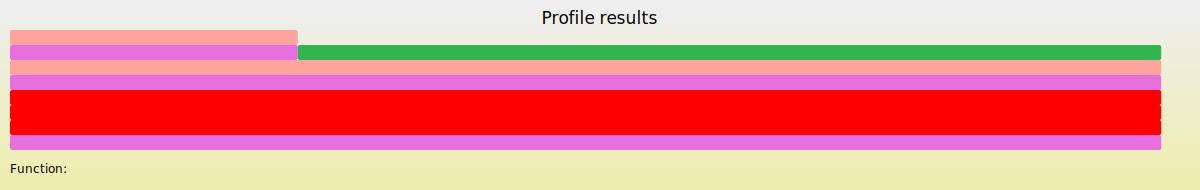

In [70]:
ProfileViewSVG.view() 

## Example 3: Binomial sampler

In [71]:
function binomial_rv(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count = count + 1    # Or count += 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

1, 6, 6, 4, 6, 9, 6, 5, 6, 8, 6, 4, 5, 6, 7, 5, 7, 5, 6, 5, 3, 6, 6, 2, 7, 

In [72]:
binomial_rv(n, p) = sum(rand() .> p for i in 1:n)

binomial_rv (generic function with 1 method)

In [73]:
binomial_rv(1000,0.5)

499

In [76]:
using RCall
R"function(n,p) sum(runif(n) > p)"(1000,0.5)

RCall.RObject{RCall.IntSxp}
[1] 484


## Parallelism

`pmap` and `@parallel` are the two most frequently used and useful functions.

In [77]:
addprocs(Sys.CPU_CORES)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [78]:
pbinomial_rv(n, p) = @parallel (+) for i=1:n
    Int(rand() > p)
end

pbinomial_rv (generic function with 1 method)

In [79]:
@btime binomial_rv(1_000_000,0.2)

  5.286 ms (2 allocations: 48 bytes)


800524

In [80]:
@btime pbinomial_rv(1_000_000,0.2)

  1.547 ms (616 allocations: 44.33 KiB)


799653

In [99]:
@time mean(map(i -> begin
    A = rand(500,500)
    eigvals(A'A)[end]
end, 1:100))

  2.220207 seconds (24.38 k allocations: 591.456 MiB, 2.58% gc time)


62568.78752369832

In [98]:
@time mean(pmap(i -> begin
    A = rand(500,500)
    eigvals(A'A)[end]
end, 1:100))

  1.157129 seconds (21.67 k allocations: 1.020 MiB)


62583.23004414645

`pmap()` is well suited for cases where a large amount of work is done by each function call, whereas `@parallel` is suited for handling situations which involve numerous small iterations.

## Interoperability

Lets use Julia to call R to call Julia...

Packages **RCall** (julia) and **runr** (R)

In [83]:
using RCall
R"""
library(runr)
j =  proc_julia()
j$start()
""";

In [84]:
R"j$exec('sum(eye(10)-I)')"

RCall.RObject{RCall.VecSxp}
sum(eye(10)-I)
# 0.0


In [85]:
R"j$stop()";

## Ranges and Generators
### (and R interop!)

In [100]:
x = 1:10_000_000

1:10000000

In [101]:
typeof(x), x isa AbstractArray

(UnitRange{Int64}, true)

In [102]:
x = -2:2
[x...]

5-element Array{Int64,1}:
 -2
 -1
  0
  1
  2

In [103]:
println(collect(1:2))
println(collect(1:1))
println(collect(1:0));

[1, 2]
[1]
Int64[]


In [104]:
R"""
print(1:2)
print(1:1)
print(1:0)
""";

[1] 1 2
[1] 1
[1] 1 0


In [105]:
collect(1:-1:0)

2-element Array{Int64,1}:
 1
 0

In [106]:
collect(1:-0.2:0)

6-element Array{Float64,1}:
 1.0
 0.8
 0.6
 0.4
 0.2
 0.0

In [107]:
x = subtypes(Range)

4-element Array{Union{DataType, UnionAll},1}:
 Base.Use_StepRangeLen_Instead
 LinSpace                     
 OrdinalRange                 
 StepRangeLen                 